In [611]:
'''
C11
Throw two dice 10 times and record the sum of the numbers obtained.
Draw the frequency curve of sum vs frequency.
Record the number of times you obtain the sum as greater than 5.
Next perform 10 trials of throwing two dice for 10 times.
Step 1: Find the number of times you obtain the sum
as greater than 5, in each trial- that is, Count
Step 2: Draw the graph of Count vs frequency
for all the trials put together.
Next perform 20 trials of throwing two dice for 10 times.
Repeat Steps 1 and 2.
Increase the number of trials to 30, 40, · · · , 100, 200, · · · , 1000, · · ·
Repeat Steps 1 and 2 in each case.
What do you observe ?- Can you identify the distribution?
'''

'\nC11\nThrow two dice 10 times and record the sum of the numbers obtained.\nDraw the frequency curve of sum vs frequency.\nRecord the number of times you obtain the sum as greater than 5.\nNext perform 10 trials of throwing two dice for 10 times.\nStep 1: Find the number of times you obtain the sum\nas greater than 5, in each trial- that is, Count\nStep 2: Draw the graph of Count vs frequency\nfor all the trials put together.\nNext perform 20 trials of throwing two dice for 10 times.\nRepeat Steps 1 and 2.\nIncrease the number of trials to 30, 40, · · · , 100, 200, · · · , 1000, · · ·\nRepeat Steps 1 and 2 in each case.\nWhat do you observe ?- Can you identify the distribution?\n'

In [612]:
from collections import Counter
from scipy.stats import kurtosistest
import random
import time
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [613]:
probabilities = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]
times = 10

In [614]:
plt.style.use("ggplot")

In [615]:
def plot_frequency_curve(data, xlabel, ylabel, title):
    unique_sums, counts = np.unique(data, return_counts=True)
    sns.set(style='whitegrid')
    fig, ax = plt.subplots()
    sns.lineplot(x=unique_sums, y=counts, ax=ax)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    plt.show()

In [616]:
def list_stats(lst):
    mean = np.mean(lst)
    stdev = np.std(lst)
    mad = np.mean(np.abs(lst - mean))
    median = np.median(lst)
    variance = np.var(lst)
    f_kurtosis = stats.kurtosis(lst, fisher=True)
    p_kurtosis = stats.kurtosis(lst, fisher=False)
    fc_kurtosis = stats.kurtosis(lst, fisher=True, bias=False)
    pc_kurtosis = stats.kurtosis(lst, fisher=False, bias=False)
#    kurtosis_stat, p_value = kurtosistest(lst) # ‘two-sided’: the kurtosis of the distribution underlying the sample is different from that of the normal distribution
    skewness = stats.skew(lst)
    
    print(f'Mean = {mean}')
    print(f'Std Dev = {stdev}')
    print(f'Mean Absolute Deviation = {mad}')
    print(f'Median = {median}')
    print(f'Variance = {variance}')
    print(f'Fisher Kurtosis = {f_kurtosis}')
    print(f'Pearson Kurtosis = {p_kurtosis}')
    print(f'Fisher Kurtosis with K-Statistics = {fc_kurtosis}')
    print(f'Pearson Kurtosis with K-Statistics = {pc_kurtosis}')
#    print(f'Kurtosis Test Z-Score = {kurtosis_stat}')
#    print(f'Kurtosis Test P-Value = {p_value}') 
    print(f'Skewness = {skewness}')

In [617]:
def roll_dice(probabilities):
    return random.choices(range(1, 7), weights=probabilities)[0]

In [618]:
def sum_roll_two_dice(probabilities, times):
    sum = []
    for i in range(times):
        result1 = roll_dice(probabilities)
        result2 = roll_dice(probabilities)
        total = result1 + result2
        sum.append(total)
    return sum

In [619]:
def throw_dice(probabilities, times, trials):
    greater_than_5 = []
    trial_total = []
    all_trials = []
    for i in range(trials):
        trial_result = sum_roll_two_dice(probabilities, times)
        count_greater_than_5 = 0
        
        for element in trial_result:
            all_trials.append(element)
            if element > 5:
                count_greater_than_5 = count_greater_than_5 + 1
                
        trial_total.append(trial_result)
        greater_than_5.append(count_greater_than_5)
        
    return greater_than_5

Rolled Numbers : [12, 6, 7, 10, 10, 7, 10, 3, 10, 6]
Count of Sum Greater than 5 : 9


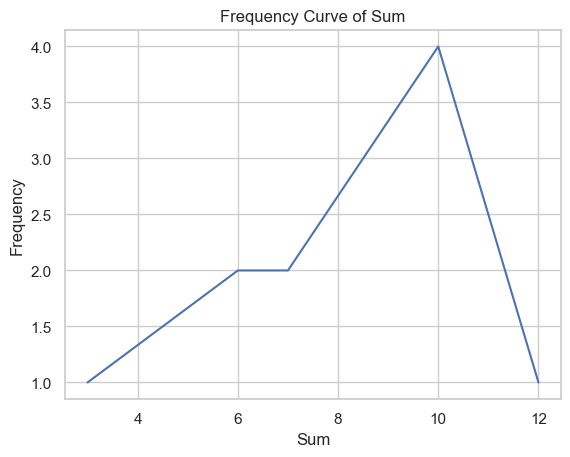

Mean = 8.1
Std Dev = 2.5865034312755126
Mean Absolute Deviation = 2.3
Median = 8.5
Variance = 6.6899999999999995
Fisher Kurtosis = -0.7616079148987511
Pearson Kurtosis = 2.238392085101249
Fisher Kurtosis with K-Statistics = -0.3821282781245774
Pearson Kurtosis with K-Statistics = 2.6178717218754226
Skewness = -0.3876625759839692


In [620]:
# Throw two dice 10 times and record the sum of the numbers obtained.
# Draw the frequency curve of sum vs frequency.
# Record the number of times you obtain the sum as greater than 5.

list = sum_roll_two_dice(probabilities, times)

count_greater_than_5 = 0
for element in list:
    if element > 5:
        count_greater_than_5 = count_greater_than_5 + 1
        
print(f'Rolled Numbers : {list}')
print(f'Count of Sum Greater than 5 : {count_greater_than_5}')
plot_frequency_curve(data=list, xlabel='Sum', ylabel='Frequency', title='Frequency Curve of Sum')
list_stats(list)

In [621]:
trials = 10
greater_than_5 = []
greater_than_5 = throw_dice(probabilities, times, trials)

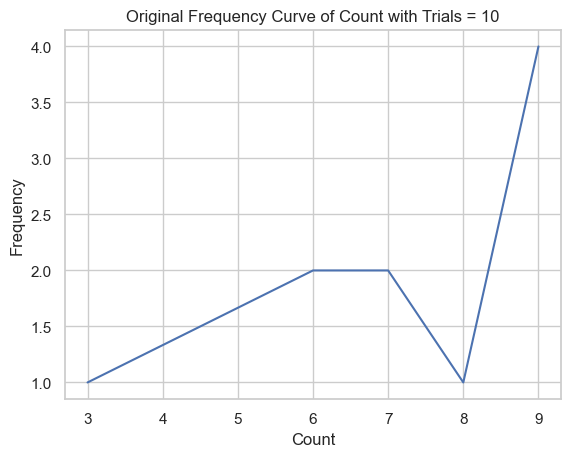

Mean = 8.1
Std Dev = 2.5865034312755126
Mean Absolute Deviation = 2.3
Median = 8.5
Variance = 6.6899999999999995
Fisher Kurtosis = -0.7616079148987511
Pearson Kurtosis = 2.238392085101249
Fisher Kurtosis with K-Statistics = -0.3821282781245774
Pearson Kurtosis with K-Statistics = 2.6178717218754226
Skewness = -0.3876625759839692


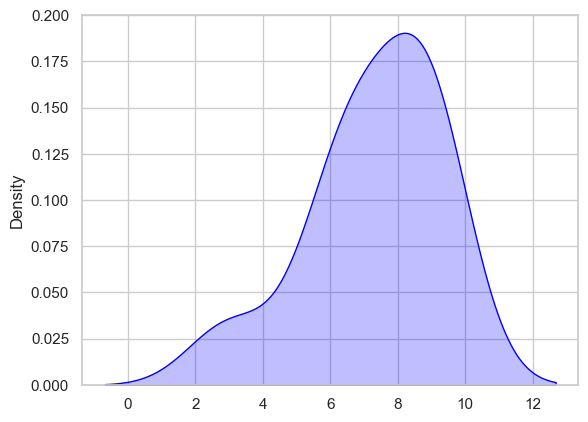

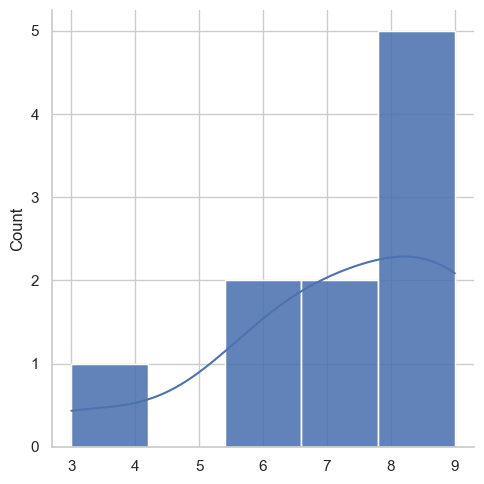

In [622]:
plot_frequency_curve(greater_than_5, xlabel="Count", ylabel="Frequency", title=f"Original Frequency Curve of Count with Trials = {trials}")
sns.kdeplot(data=greater_than_5, fill=True, color="Blue")
sns.displot(greater_than_5)
sns.histplot(greater_than_5, kde="True")
list_stats(list)

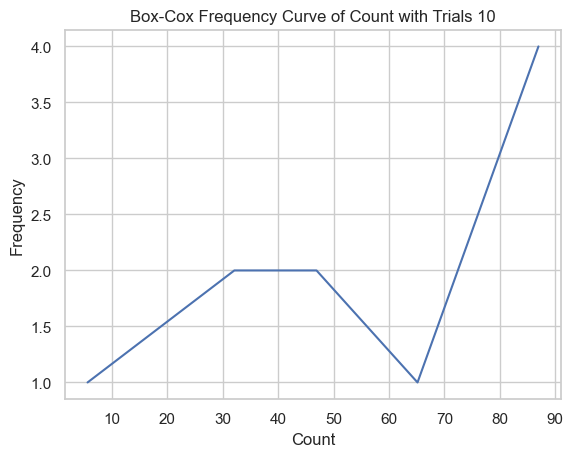

Mean = 8.1
Std Dev = 2.5865034312755126
Mean Absolute Deviation = 2.3
Median = 8.5
Variance = 6.6899999999999995
Fisher Kurtosis = -0.7616079148987511
Pearson Kurtosis = 2.238392085101249
Fisher Kurtosis with K-Statistics = -0.3821282781245774
Pearson Kurtosis with K-Statistics = 2.6178717218754226
Skewness = -0.3876625759839692


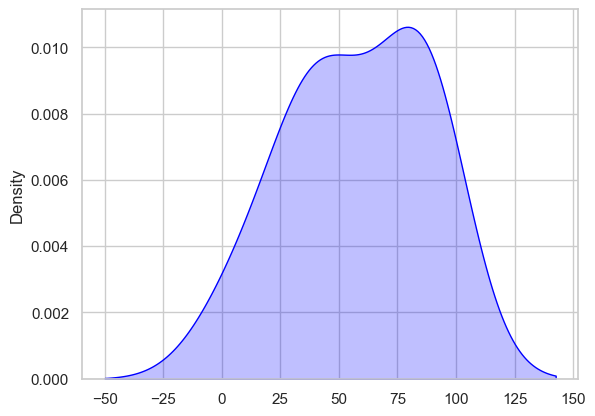

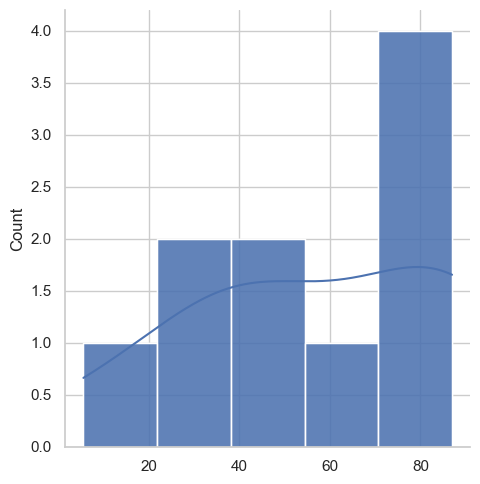

In [623]:
greater_than_5_bc, _ = stats.boxcox(greater_than_5)
    
plot_frequency_curve(greater_than_5_bc, xlabel="Count", ylabel="Frequency", title=f"Box-Cox Frequency Curve of Count with Trials {trials}")
sns.kdeplot(data=greater_than_5_bc, fill=True, color="Blue")
sns.displot(greater_than_5_bc)
sns.histplot(greater_than_5_bc, kde="True") 
list_stats(list)

In [624]:
trials = 20
greater_than_5 = []
greater_than_5 = throw_dice(probabilities, times, trials)

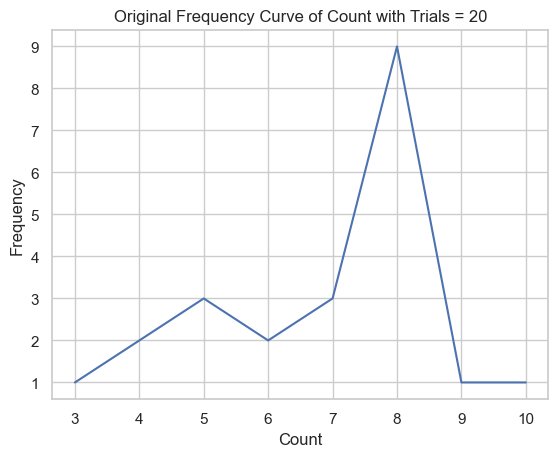

Mean = 8.1
Std Dev = 2.5865034312755126
Mean Absolute Deviation = 2.3
Median = 8.5
Variance = 6.6899999999999995
Fisher Kurtosis = -0.7616079148987511
Pearson Kurtosis = 2.238392085101249
Fisher Kurtosis with K-Statistics = -0.3821282781245774
Pearson Kurtosis with K-Statistics = 2.6178717218754226
Skewness = -0.3876625759839692


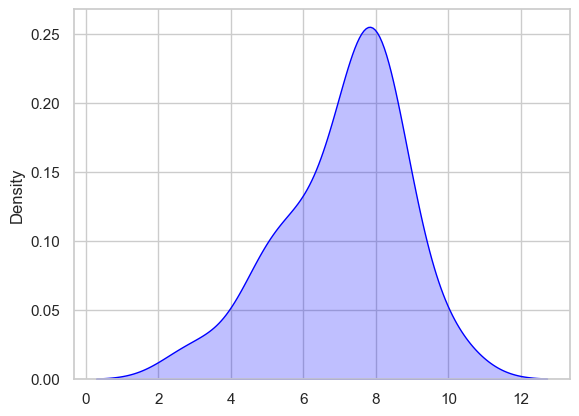

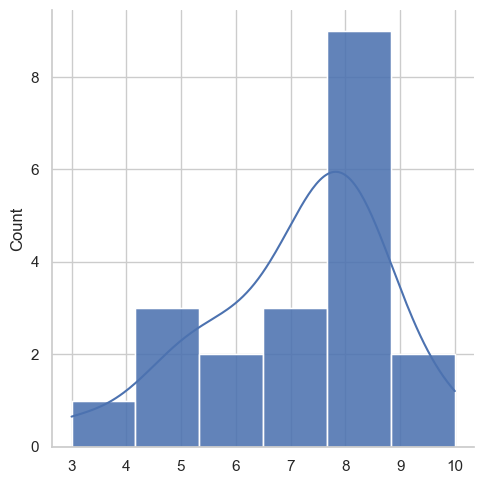

In [625]:
plot_frequency_curve(greater_than_5, xlabel="Count", ylabel="Frequency", title=f"Original Frequency Curve of Count with Trials = {trials}")
sns.kdeplot(data=greater_than_5, fill=True, color="Blue")
sns.displot(greater_than_5)
sns.histplot(greater_than_5, kde="True")
list_stats(list)

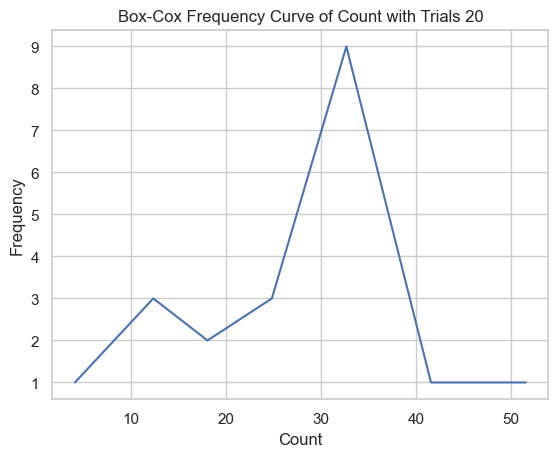

Mean = 8.1
Std Dev = 2.5865034312755126
Mean Absolute Deviation = 2.3
Median = 8.5
Variance = 6.6899999999999995
Fisher Kurtosis = -0.7616079148987511
Pearson Kurtosis = 2.238392085101249
Fisher Kurtosis with K-Statistics = -0.3821282781245774
Pearson Kurtosis with K-Statistics = 2.6178717218754226
Skewness = -0.3876625759839692


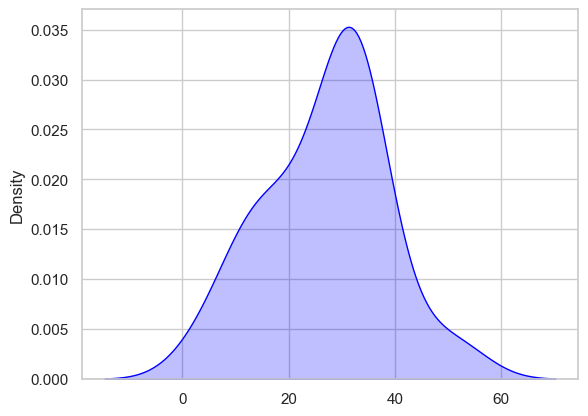

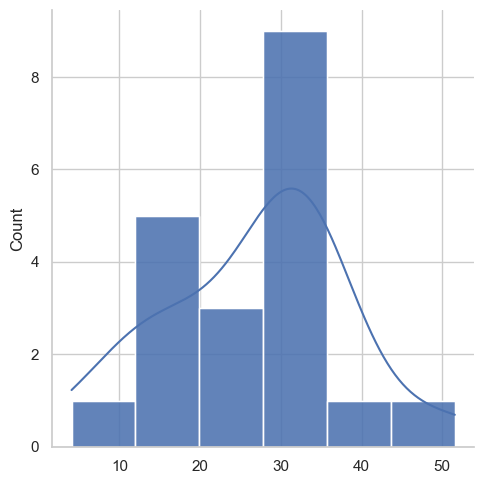

In [626]:
greater_than_5_bc, _ = stats.boxcox(greater_than_5)
    
plot_frequency_curve(greater_than_5_bc, xlabel="Count", ylabel="Frequency", title=f"Box-Cox Frequency Curve of Count with Trials {trials}")
sns.kdeplot(data=greater_than_5_bc, fill=True, color="Blue")
sns.displot(greater_than_5_bc)
sns.histplot(greater_than_5_bc, kde="True") 
list_stats(list)

In [627]:
trials = 30
greater_than_5 = []
greater_than_5 = throw_dice(probabilities, times, trials)

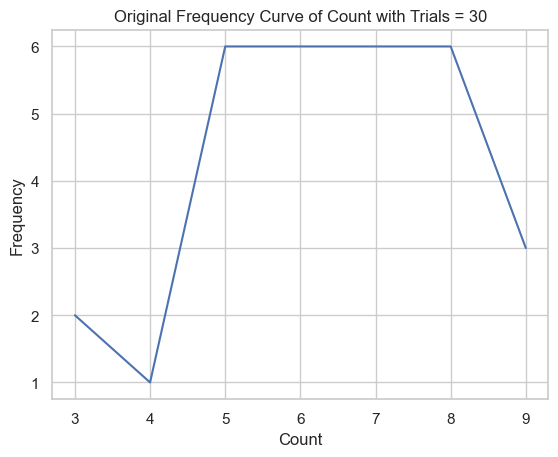

Mean = 8.1
Std Dev = 2.5865034312755126
Mean Absolute Deviation = 2.3
Median = 8.5
Variance = 6.6899999999999995
Fisher Kurtosis = -0.7616079148987511
Pearson Kurtosis = 2.238392085101249
Fisher Kurtosis with K-Statistics = -0.3821282781245774
Pearson Kurtosis with K-Statistics = 2.6178717218754226
Skewness = -0.3876625759839692


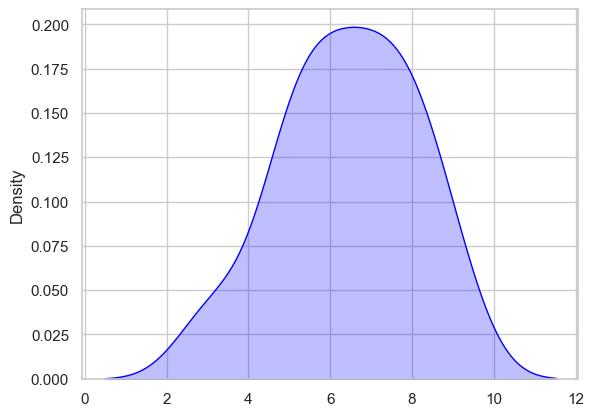

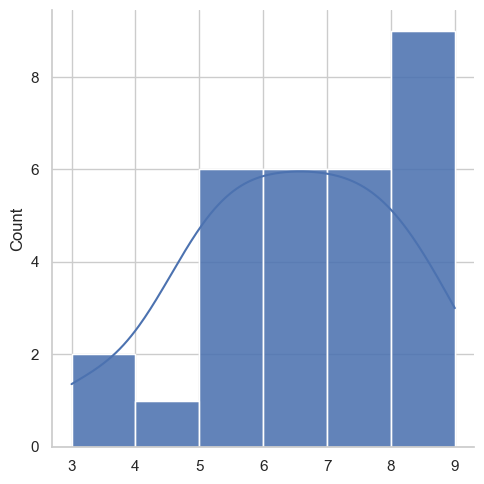

In [628]:
plot_frequency_curve(greater_than_5, xlabel="Count", ylabel="Frequency", title=f"Original Frequency Curve of Count with Trials = {trials}")
sns.kdeplot(data=greater_than_5, fill=True, color="Blue")
sns.displot(greater_than_5)
sns.histplot(greater_than_5, kde="True")
list_stats(list)

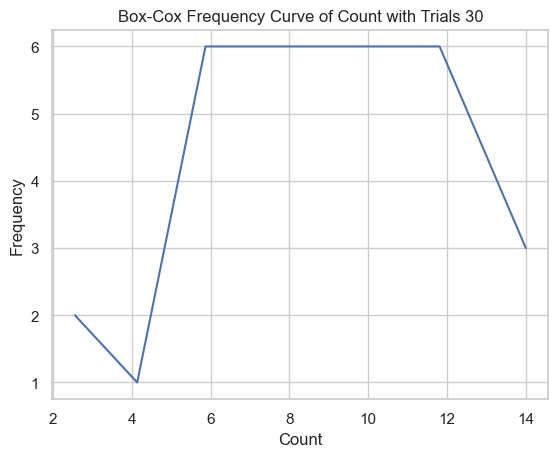

Mean = 8.1
Std Dev = 2.5865034312755126
Mean Absolute Deviation = 2.3
Median = 8.5
Variance = 6.6899999999999995
Fisher Kurtosis = -0.7616079148987511
Pearson Kurtosis = 2.238392085101249
Fisher Kurtosis with K-Statistics = -0.3821282781245774
Pearson Kurtosis with K-Statistics = 2.6178717218754226
Skewness = -0.3876625759839692


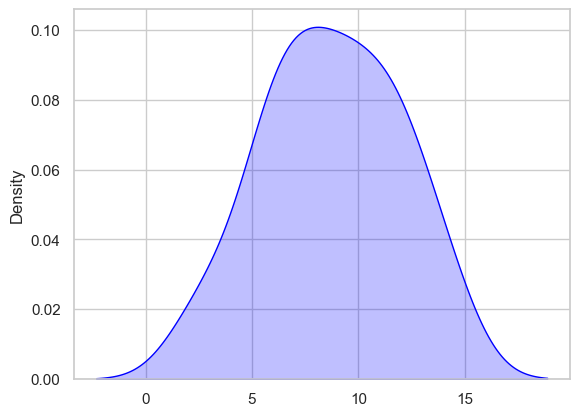

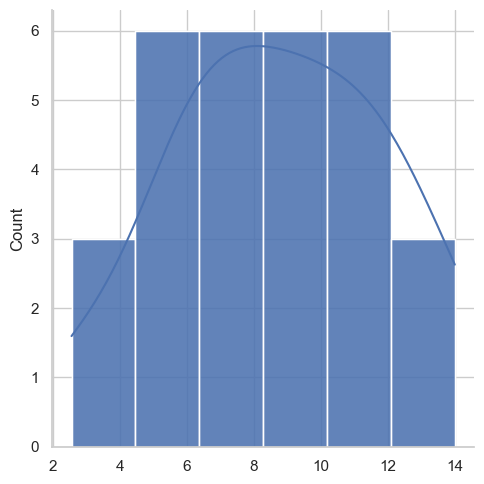

In [629]:
greater_than_5_bc, _ = stats.boxcox(greater_than_5)
    
plot_frequency_curve(greater_than_5_bc, xlabel="Count", ylabel="Frequency", title=f"Box-Cox Frequency Curve of Count with Trials {trials}")
sns.kdeplot(data=greater_than_5_bc, fill=True, color="Blue")
sns.displot(greater_than_5_bc)
sns.histplot(greater_than_5_bc, kde="True") 
list_stats(list)

In [630]:
trials = 40
greater_than_5 = []
greater_than_5 = throw_dice(probabilities, times, trials)

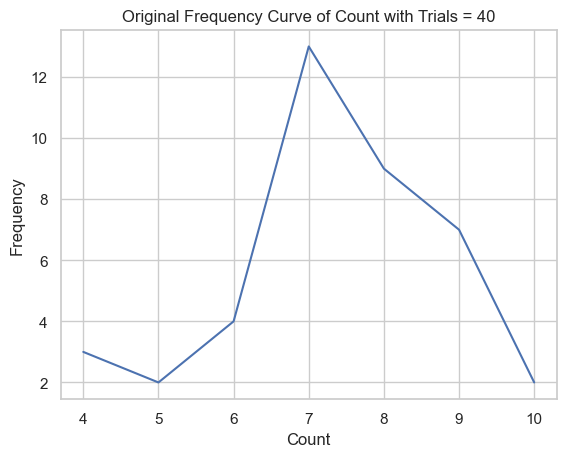

Mean = 8.1
Std Dev = 2.5865034312755126
Mean Absolute Deviation = 2.3
Median = 8.5
Variance = 6.6899999999999995
Fisher Kurtosis = -0.7616079148987511
Pearson Kurtosis = 2.238392085101249
Fisher Kurtosis with K-Statistics = -0.3821282781245774
Pearson Kurtosis with K-Statistics = 2.6178717218754226
Skewness = -0.3876625759839692


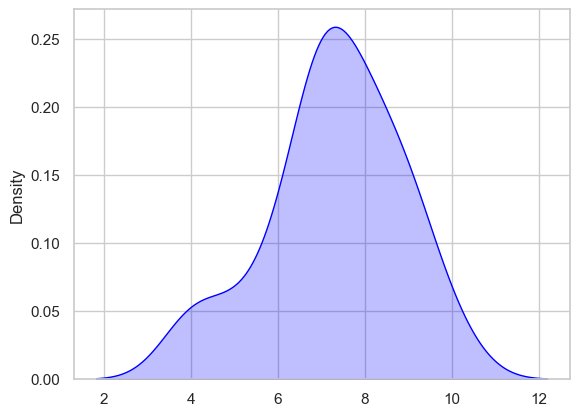

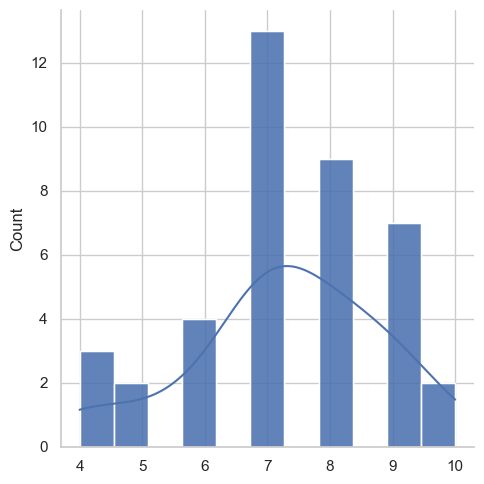

In [631]:
plot_frequency_curve(greater_than_5, xlabel="Count", ylabel="Frequency", title=f"Original Frequency Curve of Count with Trials = {trials}")
sns.kdeplot(data=greater_than_5, fill=True, color="Blue")
sns.displot(greater_than_5)
sns.histplot(greater_than_5, kde="True")
list_stats(list)

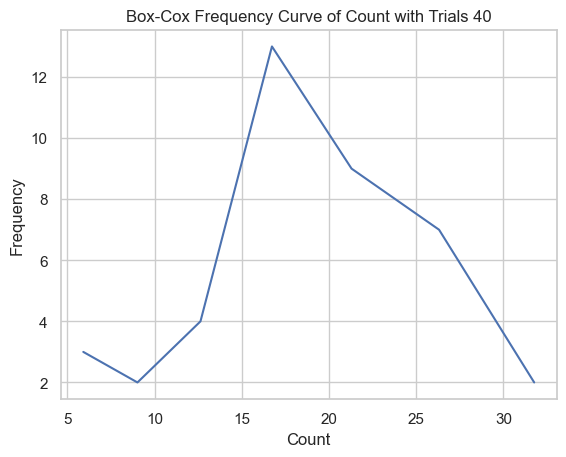

Mean = 8.1
Std Dev = 2.5865034312755126
Mean Absolute Deviation = 2.3
Median = 8.5
Variance = 6.6899999999999995
Fisher Kurtosis = -0.7616079148987511
Pearson Kurtosis = 2.238392085101249
Fisher Kurtosis with K-Statistics = -0.3821282781245774
Pearson Kurtosis with K-Statistics = 2.6178717218754226
Skewness = -0.3876625759839692


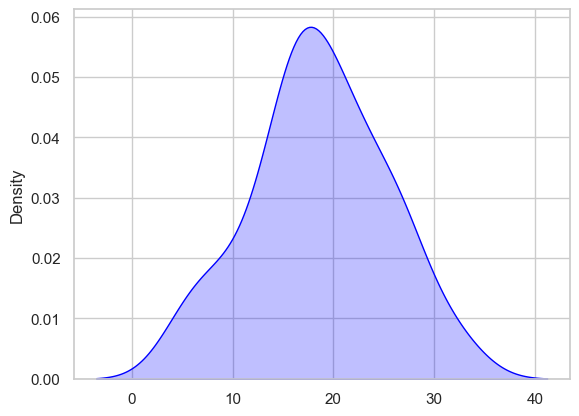

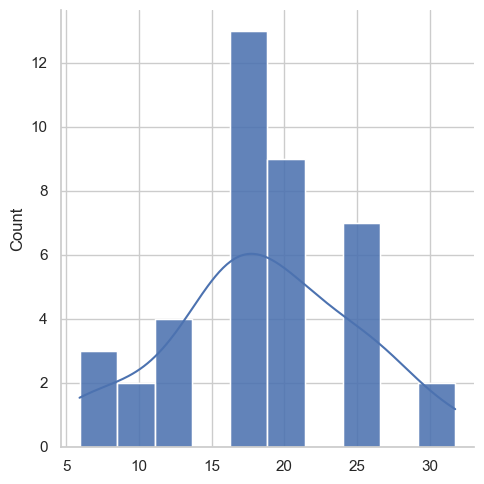

In [632]:
greater_than_5_bc, _ = stats.boxcox(greater_than_5)
    
plot_frequency_curve(greater_than_5_bc, xlabel="Count", ylabel="Frequency", title=f"Box-Cox Frequency Curve of Count with Trials {trials}")
sns.kdeplot(data=greater_than_5_bc, fill=True, color="Blue")
sns.displot(greater_than_5_bc)
sns.histplot(greater_than_5_bc, kde="True") 
list_stats(list)

In [633]:
trials = 100
greater_than_5 = []
greater_than_5 = throw_dice(probabilities, times, trials)

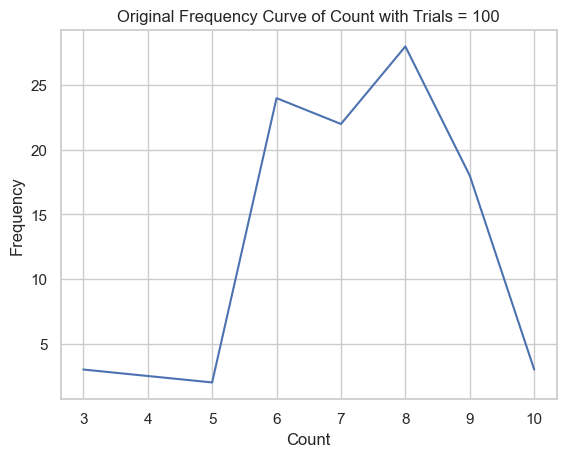

Mean = 8.1
Std Dev = 2.5865034312755126
Mean Absolute Deviation = 2.3
Median = 8.5
Variance = 6.6899999999999995
Fisher Kurtosis = -0.7616079148987511
Pearson Kurtosis = 2.238392085101249
Fisher Kurtosis with K-Statistics = -0.3821282781245774
Pearson Kurtosis with K-Statistics = 2.6178717218754226
Skewness = -0.3876625759839692


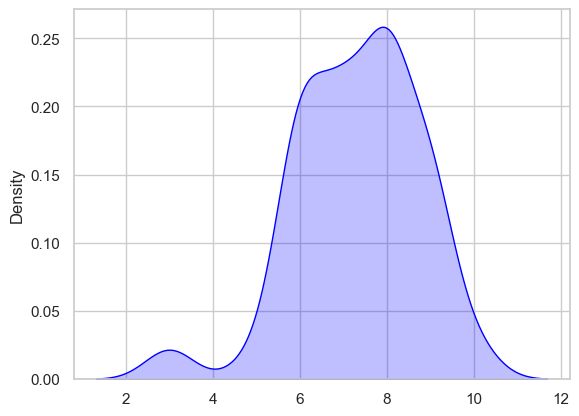

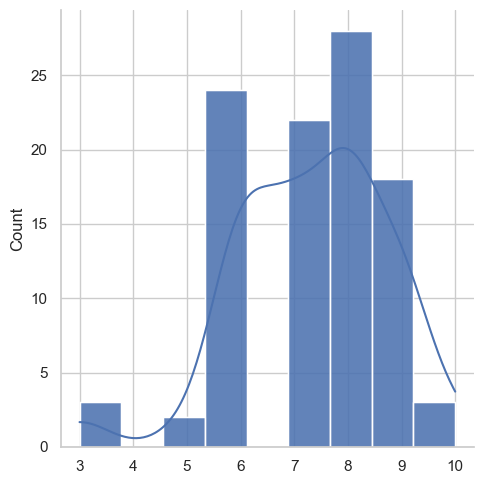

In [634]:
plot_frequency_curve(greater_than_5, xlabel="Count", ylabel="Frequency", title=f"Original Frequency Curve of Count with Trials = {trials}")
sns.kdeplot(data=greater_than_5, fill=True, color="Blue")
sns.displot(greater_than_5)
sns.histplot(greater_than_5, kde="True")
list_stats(list)

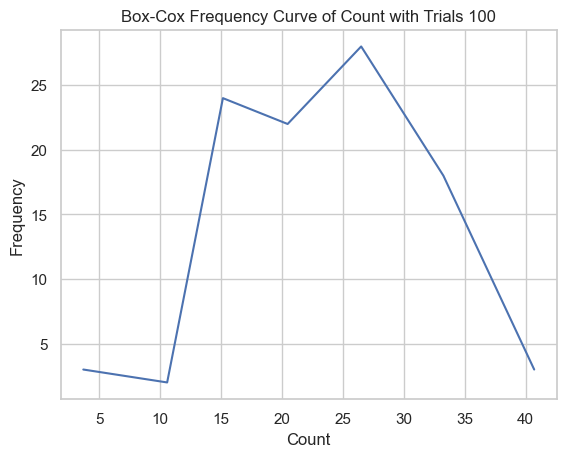

Mean = 8.1
Std Dev = 2.5865034312755126
Mean Absolute Deviation = 2.3
Median = 8.5
Variance = 6.6899999999999995
Fisher Kurtosis = -0.7616079148987511
Pearson Kurtosis = 2.238392085101249
Fisher Kurtosis with K-Statistics = -0.3821282781245774
Pearson Kurtosis with K-Statistics = 2.6178717218754226
Skewness = -0.3876625759839692


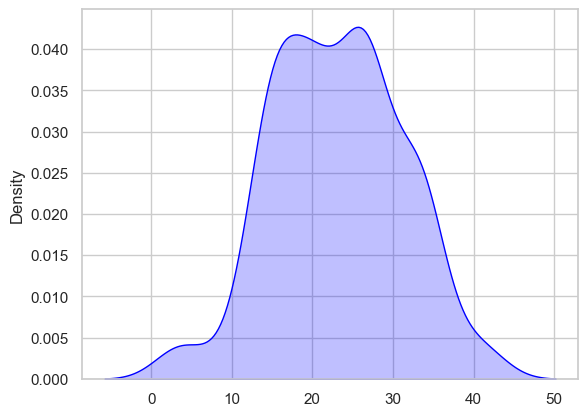

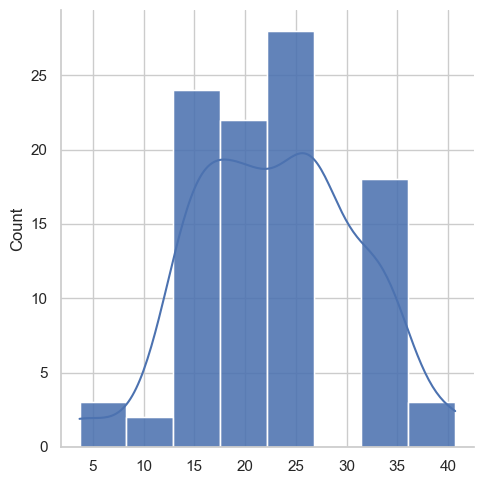

In [635]:
greater_than_5_bc, _ = stats.boxcox(greater_than_5)
    
plot_frequency_curve(greater_than_5_bc, xlabel="Count", ylabel="Frequency", title=f"Box-Cox Frequency Curve of Count with Trials {trials}")
sns.kdeplot(data=greater_than_5_bc, fill=True, color="Blue")
sns.displot(greater_than_5_bc)
sns.histplot(greater_than_5_bc, kde="True") 
list_stats(list)

In [636]:
trials = 200
greater_than_5 = []
greater_than_5 = throw_dice(probabilities, times, trials)

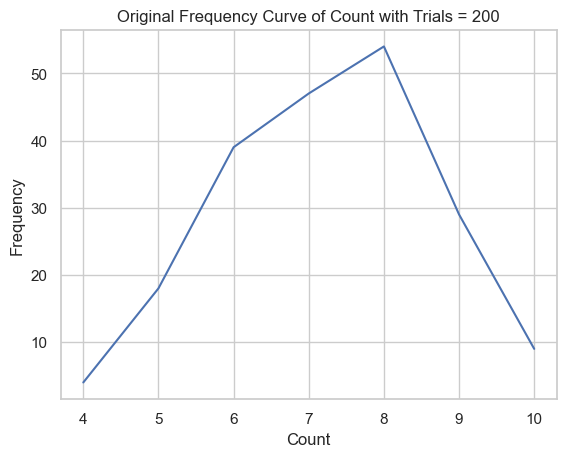

Mean = 8.1
Std Dev = 2.5865034312755126
Mean Absolute Deviation = 2.3
Median = 8.5
Variance = 6.6899999999999995
Fisher Kurtosis = -0.7616079148987511
Pearson Kurtosis = 2.238392085101249
Fisher Kurtosis with K-Statistics = -0.3821282781245774
Pearson Kurtosis with K-Statistics = 2.6178717218754226
Skewness = -0.3876625759839692


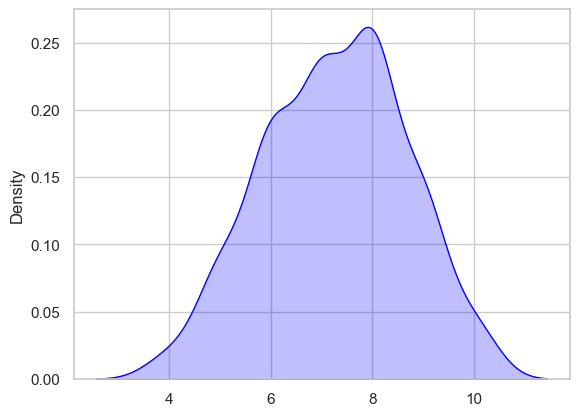

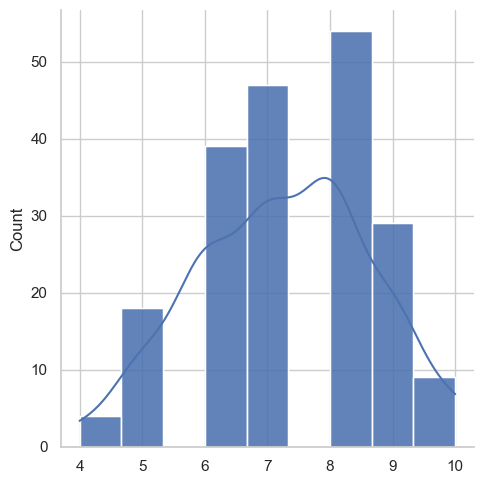

In [637]:
plot_frequency_curve(greater_than_5, xlabel="Count", ylabel="Frequency", title=f"Original Frequency Curve of Count with Trials = {trials}")
sns.kdeplot(data=greater_than_5, fill=True, color="Blue")
sns.displot(greater_than_5)
sns.histplot(greater_than_5, kde="True")
list_stats(list)

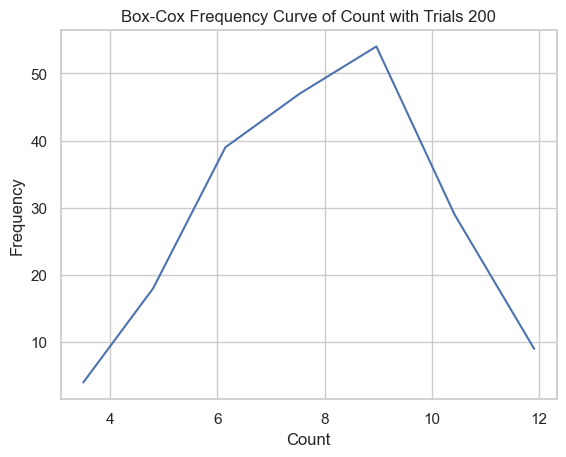

Mean = 8.1
Std Dev = 2.5865034312755126
Mean Absolute Deviation = 2.3
Median = 8.5
Variance = 6.6899999999999995
Fisher Kurtosis = -0.7616079148987511
Pearson Kurtosis = 2.238392085101249
Fisher Kurtosis with K-Statistics = -0.3821282781245774
Pearson Kurtosis with K-Statistics = 2.6178717218754226
Skewness = -0.3876625759839692


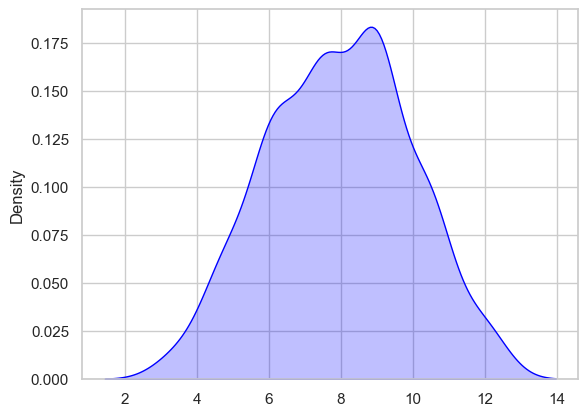

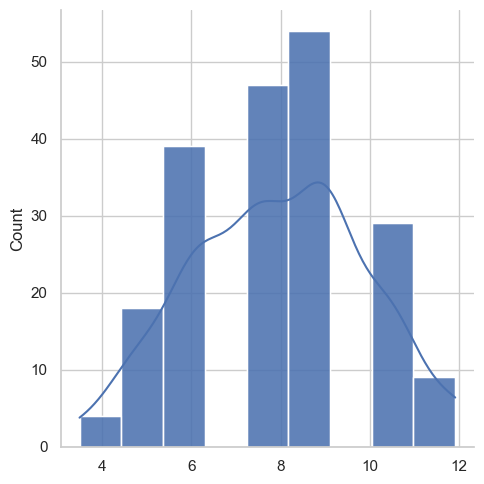

In [638]:
greater_than_5_bc, _ = stats.boxcox(greater_than_5)
    
plot_frequency_curve(greater_than_5_bc, xlabel="Count", ylabel="Frequency", title=f"Box-Cox Frequency Curve of Count with Trials {trials}")
sns.kdeplot(data=greater_than_5_bc, fill=True, color="Blue")
sns.displot(greater_than_5_bc)
sns.histplot(greater_than_5_bc, kde="True") 
list_stats(list)

In [639]:
trials = 1000
greater_than_5 = []
greater_than_5 = throw_dice(probabilities, times, trials)

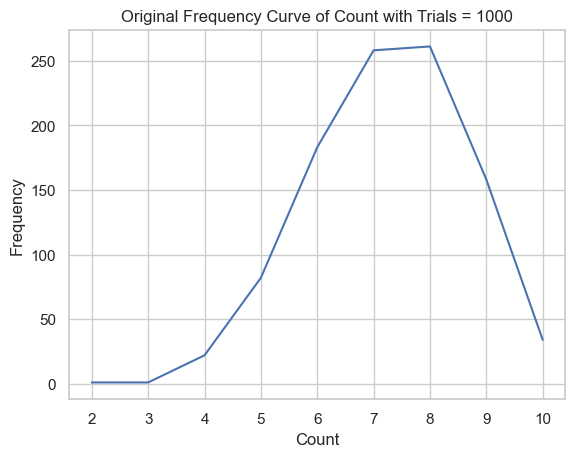

Mean = 8.1
Std Dev = 2.5865034312755126
Mean Absolute Deviation = 2.3
Median = 8.5
Variance = 6.6899999999999995
Fisher Kurtosis = -0.7616079148987511
Pearson Kurtosis = 2.238392085101249
Fisher Kurtosis with K-Statistics = -0.3821282781245774
Pearson Kurtosis with K-Statistics = 2.6178717218754226
Skewness = -0.3876625759839692


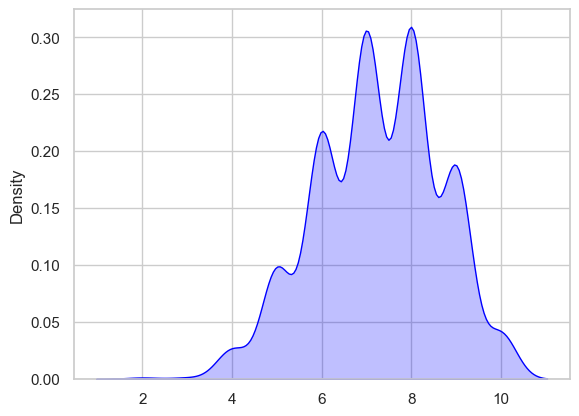

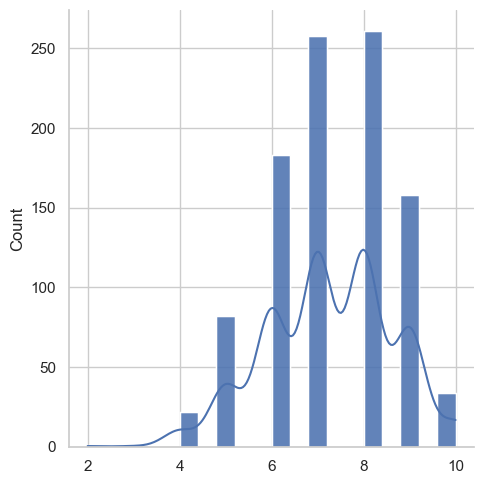

In [640]:
plot_frequency_curve(greater_than_5, xlabel="Count", ylabel="Frequency", title=f"Original Frequency Curve of Count with Trials = {trials}")
sns.kdeplot(data=greater_than_5, fill=True, color="Blue")
sns.displot(greater_than_5)
sns.histplot(greater_than_5, kde="True")
list_stats(list)

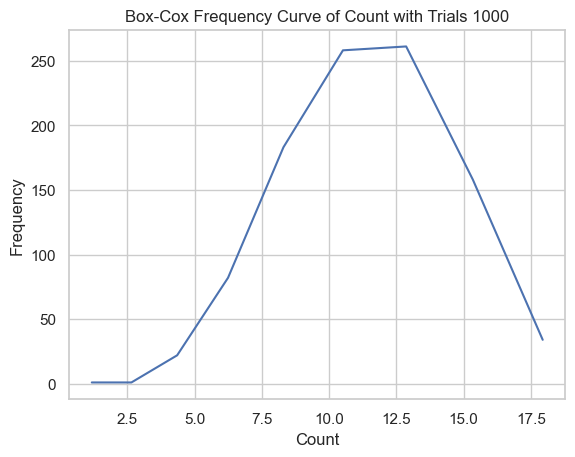

Mean = 8.1
Std Dev = 2.5865034312755126
Mean Absolute Deviation = 2.3
Median = 8.5
Variance = 6.6899999999999995
Fisher Kurtosis = -0.7616079148987511
Pearson Kurtosis = 2.238392085101249
Fisher Kurtosis with K-Statistics = -0.3821282781245774
Pearson Kurtosis with K-Statistics = 2.6178717218754226
Skewness = -0.3876625759839692


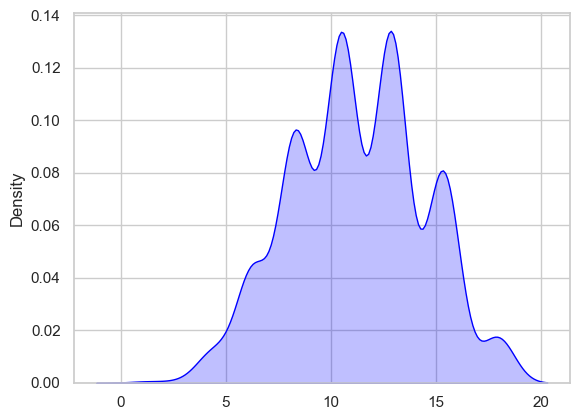

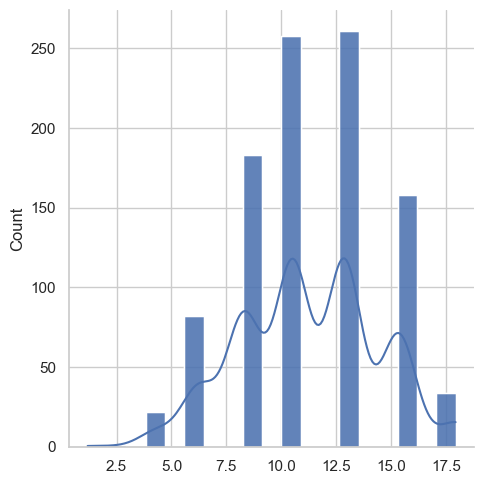

In [641]:
greater_than_5_bc, _ = stats.boxcox(greater_than_5)
    
plot_frequency_curve(greater_than_5_bc, xlabel="Count", ylabel="Frequency", title=f"Box-Cox Frequency Curve of Count with Trials {trials}")
sns.kdeplot(data=greater_than_5_bc, fill=True, color="Blue")
sns.displot(greater_than_5_bc)
sns.histplot(greater_than_5_bc, kde="True") 
list_stats(list)

In [642]:
trials = 100000
greater_than_5 = []
greater_than_5 = throw_dice(probabilities, times, trials)

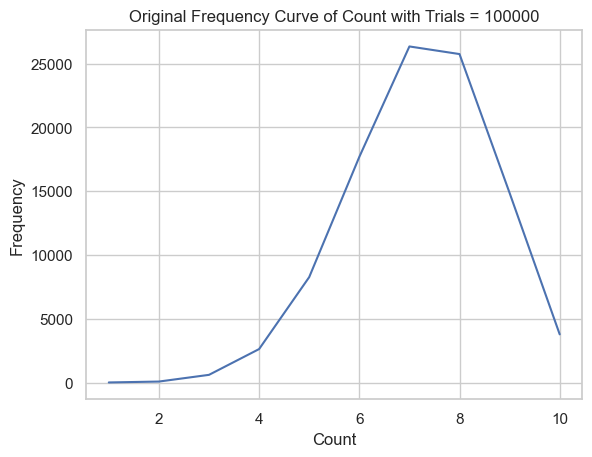

Mean = 8.1
Std Dev = 2.5865034312755126
Mean Absolute Deviation = 2.3
Median = 8.5
Variance = 6.6899999999999995
Fisher Kurtosis = -0.7616079148987511
Pearson Kurtosis = 2.238392085101249
Fisher Kurtosis with K-Statistics = -0.3821282781245774
Pearson Kurtosis with K-Statistics = 2.6178717218754226
Skewness = -0.3876625759839692


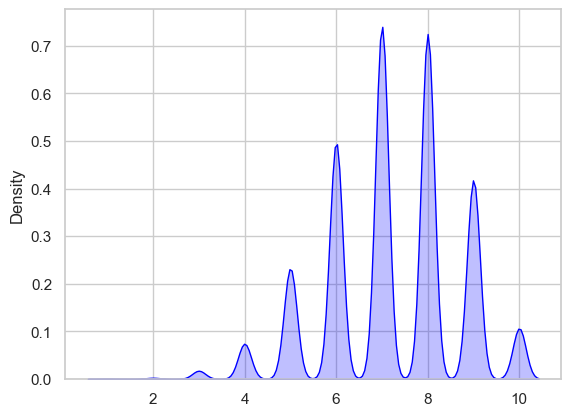

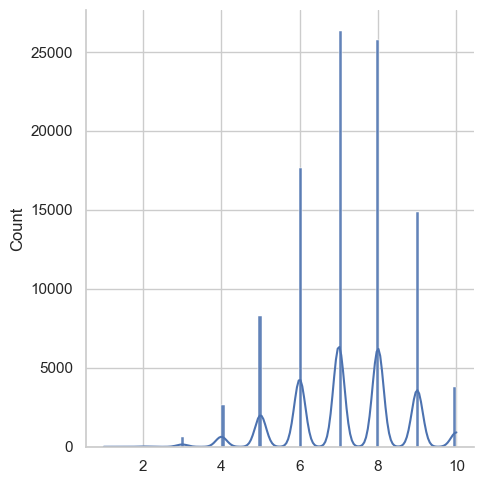

In [643]:
plot_frequency_curve(greater_than_5, xlabel="Count", ylabel="Frequency", title=f"Original Frequency Curve of Count with Trials = {trials}")
sns.kdeplot(data=greater_than_5, fill=True, color="Blue")
sns.displot(greater_than_5)
sns.histplot(greater_than_5, kde="True")
list_stats(list)

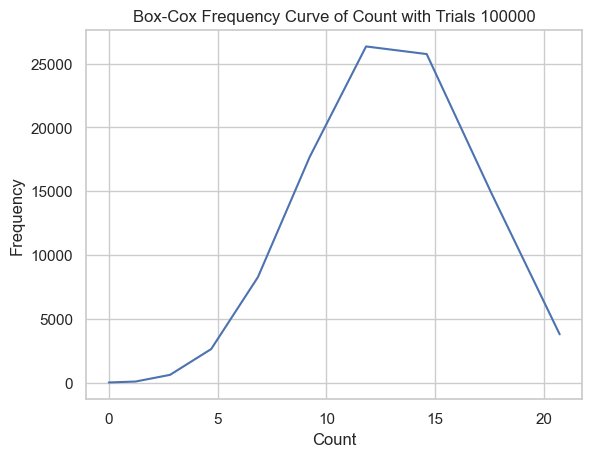

Mean = 8.1
Std Dev = 2.5865034312755126
Mean Absolute Deviation = 2.3
Median = 8.5
Variance = 6.6899999999999995
Fisher Kurtosis = -0.7616079148987511
Pearson Kurtosis = 2.238392085101249
Fisher Kurtosis with K-Statistics = -0.3821282781245774
Pearson Kurtosis with K-Statistics = 2.6178717218754226
Skewness = -0.3876625759839692


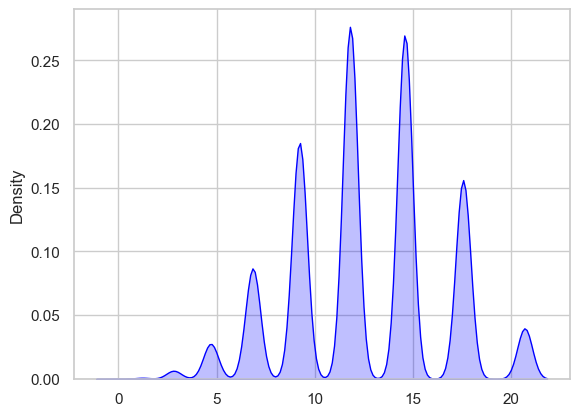

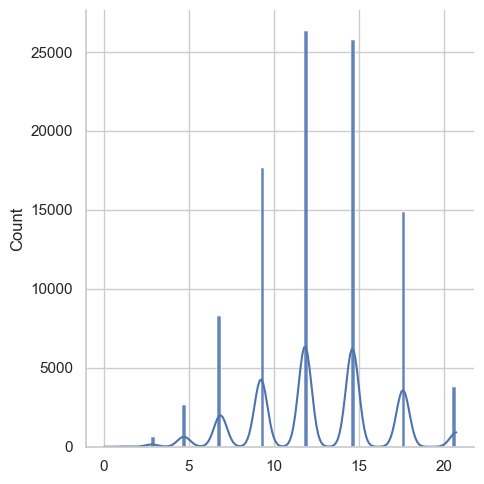

In [644]:
greater_than_5_bc, _ = stats.boxcox(greater_than_5)
    
plot_frequency_curve(greater_than_5_bc, xlabel="Count", ylabel="Frequency", title=f"Box-Cox Frequency Curve of Count with Trials {trials}")
sns.kdeplot(data=greater_than_5_bc, fill=True, color="Blue")
sns.displot(greater_than_5_bc)
sns.histplot(greater_than_5_bc, kde="True") 
list_stats(list)